# Ferrofluid - Part III 

## Table of Contents
1. [Susceptibility with fluctuation formulas](#Susceptibility-with-fluctuation-formulas)
    1. [Derivation of the fluctuation formular](#Derivation-of-the-fluctuation-formular)
    2. [Simulation](#Simulation)
2. [Magnetization curve of a 3D system](#Magnetization-curve-of-a-3D-system)

**Remark**: The equilibration and sampling times used in this tutorial would be not sufficient for scientific  purposes, but they are long enough to get at least a qualitative insight of the behaviour of ferrofluids. They have been shortened so we achieve reasonable computation times for the purpose of a tutorial.

## Susceptibility with fluctuation formulas

In this part we want to calculate estimators for the initial susceptibility, i.e. the susceptibility at zero external magnetic field. One could carry out several simulations with different external magnetic field strenghts and get the initial susceptibility by fitting a line to the results. We want to go a more elegant way by using fluctuation formulas known from statistical mechanics.
In three dimensions the initial susceptibility $\chi_{init}$ can be calculated with zero field simulations through

\begin{equation}
    \chi_{init} = \frac{V \cdot \mu_0}{3 \cdot k_B T} \left( \langle \boldsymbol{M}^2 \rangle - \langle \boldsymbol{M} \rangle^2 \right) = \frac{\mu_0}{3 \cdot k_B T \cdot V} \left( \langle \boldsymbol{\mu}^2 \rangle - \langle \boldsymbol{\mu} \rangle^2 \right)
\end{equation}

where $\boldsymbol{M}$ is the magnetization vector and $\boldsymbol{\mu}$ is the total magnetic dipole moment of the system. In direction $i$ it reads

\begin{equation}
    M_i = \frac{1}{V} \Bigg\langle \sum_{j=1}^N \tilde{\mu}_j^i \Bigg\rangle
\end{equation}

where $\tilde{\mu}_j^i$ is the $j$ th dipole moment in direction $i$.

### Derivation of the fluctuation formular

We want to derive the fluctuation formula. We start with the definition of the magnetic susceptibility. In general this reads

\begin{equation}
    \chi \equiv \frac{\partial}{\partial H} \langle M_{\boldsymbol{H}} \rangle
\end{equation}

with $\langle M_{\boldsymbol{H}} \rangle$ the ensemble averaged magnetization in direction of a homogeneous external magnetic field $\boldsymbol{H}$.

In thermal equilibrium the ensemble average of the magnetization reads

\begin{equation}
    \langle M_{\boldsymbol{H}} \rangle = \frac{1}{V Z_c} \left \lbrack \sum_{\alpha} \mu_{\boldsymbol{H},\alpha} e^{ -\beta E_{\alpha}(H=0) + \beta\mu_0\mu_{\boldsymbol{H},\alpha}H }\right \rbrack
\end{equation}

with $Z_c$ the canonical partition function, $E_{\alpha}(H=0)$ the energy without an external magnetic field $\boldsymbol{H}$, $\beta$ the inverse thermal energy $\frac{1}{k_BT}$, $\mu_{\boldsymbol{H},\alpha}$ the total magnetic dipole moment of the system in direction of the external magnetic field $\boldsymbol{H}$ in microstate $\alpha$ and $V$ the system volume.

Now we insert the magnetization $\langle M_{\boldsymbol{H}} \rangle$ in the definition of the magnetic susceptibility $\chi$ and let the derivative operate on the ensemble average. We get the fluctuation formular

\begin{equation}
    \chi = \frac{\beta\mu_0}{V} \left \lbrack \frac{1}{Z_c}\sum_{\alpha} \mu_{\alpha}^2~ e^{ -\beta E_{\alpha}(H=0) + \beta\mu_0\mu_{\boldsymbol{H},\alpha}H } - \frac{1}{Z_c}\sum_{\alpha} \mu_{\alpha}~ e^{ -\beta E_{\alpha}(H=0) + \beta\mu_0\mu_{\boldsymbol{H},\alpha}H }~~ \frac{1}{Z_c}\sum_{\alpha'}\mu_{\alpha'}~ e^{ -\beta E_{\alpha'}(H=0) + \beta\mu_0\mu_{\boldsymbol{H},\alpha}H }\right \rbrack = \frac{\beta\mu_0}{V} \left \lbrack \langle \mu_{\boldsymbol{H}}^2 \rangle - \langle \mu_{\boldsymbol{H}} \rangle^2 \right \rbrack = \frac{\beta\mu_0}{V} \left(\Delta \mu_{\boldsymbol{H}}\right)^2
\end{equation}

At zero external magentic field ($H = 0$) there is no distinct direction for the system, so we can take the fluctuations $\Delta \mu$ in all directions and divide it by the dimension. Thus we can use more data points of our simulation for the average and get a more precise estimatior for the susceptibility. Thus finally the fluctuation formular for the initial susceptibility in three dimensions reads

\begin{equation}
    \chi_{init} = \frac{\beta\mu_0}{3V} \left \lbrack \langle \boldsymbol{\mu}^2 \rangle - \langle \boldsymbol{\mu} \rangle^2 \right \rbrack = \frac{V\beta\mu_0}{3} \left \lbrack \langle \boldsymbol{M}^2 \rangle - \langle \boldsymbol{M} \rangle^2 \right \rbrack
\end{equation}

where $\boldsymbol{\mu}$ and $\boldsymbol{M}$ are defined above.

### Simulation

In this part we want to consider a three dimensional ferrofluid system and compare our result for the initial susceptibility $\chi_{init}$ with them of Ref. [1].

First we import all necessary packages

In [1]:
from __future__ import print_function

import espressomd
from espressomd.magnetostatics import DipolarP3M
import numpy as np

Now we setting up all necessary simulation parameters

In [2]:
lj_sigma=1
lj_epsilon=1
lj_cut = 2**(1./6.) * lj_sigma

# magnetic field constant
mu_0 = 1.

# Particles
N = 1000

# Volume fraction
# phi = rho * 4. / 3. * np.pi * ( lj_sigma / 2 )**3.
phi = 0.0262

# Dipolar interaction parameter lambda = mu_0 m^2 /(4 pi sigma^3 kT)
dip_lambda = 3.

# Temperature
kT =1.0

# Friction coefficient
gamma=1.0

# Time step
dt =0.02

# box size 3d
box_size = (N * np.pi * 4./3. * (lj_sigma / 2.)**3. / phi)**(1./3.)

and the system, where we, as we did in **part I**, only commit the orientation of the dipole moment to the particles and take the magnitude into account in the prefactor of Dipolar P3M (for more details see **part I**). The last line of the output is the value of the tuned skin.

In [3]:
system=espressomd.System(box_l=(box_size,box_size,box_size)) 
system.time_step=dt
system.thermostat.set_langevin(kT=kT,gamma=gamma)
system.set_random_state_PRNG()

# Lennard Jones interaction
system.non_bonded_inter[0,0].lennard_jones.set_params(epsilon=lj_epsilon,sigma=lj_sigma,cutoff=lj_cut, shift="auto")

# Random dipole moments
dip_phi=np.random.random((N,1)) *2. * np.pi
dip_cos_theta = 2*np.random.random((N,1)) -1
dip_sin_theta = np.sin(np.arccos(dip_cos_theta))
dip = np.hstack((
   dip_sin_theta *np.sin(dip_phi),
   dip_sin_theta *np.cos(dip_phi),
   dip_cos_theta))

# Random positions in system volume
pos = box_size * np.random.random((N,3))

# Add particles
system.part.add(pos=pos, rotation=N*[(1,1,1)], dip=dip)

# Remove overlap between particles by means of the steepest descent method
system.integrator.set_steepest_descent(
    f_max=0,gamma=0.1,max_displacement=0.05)

while system.analysis.energy()["total"] > 5*kT*N:
    system.integrator.run(20)

# Switch to velocity Verlet integrator
system.integrator.set_vv()

# tune verlet list skin
system.cell_system.tune_skin(min_skin=0.4, max_skin=2., tol=0.2, int_steps=100)

# Setup dipolar P3M and dipolar layer correction
system.actors.add(DipolarP3M(accuracy=5E-4,prefactor=dip_lambda*lj_sigma**3*kT))

# tune verlet list skin again
system.cell_system.tune_skin(min_skin=0.4, max_skin=2., tol=0.2, int_steps=100)

Dipolar P3M tune parameters: Accuracy goal = 5.00000e-04 prefactor = 3.00000e+00
System: box_l = 2.71372e+01 # charged part = 1000 Sum[q_i^2] = 1.00000e+03
Dmesh cao Dr_cut_iL   Dalpha_L     Derr         Drs_err    Dks_err    time [ms]
8    3   4.24107e-01 5.17041e+00 4.99109e-04 3.535e-04 3.523e-04 19      
8    2   4.29986e-01 5.07155e+00 8.63822e-04 3.535e-04 7.882e-04 accuracy not achieved
8    4   3.98912e-01 5.62861e+00 4.98339e-04 3.535e-04 3.512e-04 18      
8    5   3.85475e-01 5.89866e+00 4.97284e-04 3.535e-04 3.497e-04 19      
8    6   3.79597e-01 6.02308e+00 4.94153e-04 3.535e-04 3.452e-04 20      
10   4   3.58398e-01 6.50748e+00 4.96490e-04 3.536e-04 3.486e-04 15      
10   3   3.84109e-01 5.92720e+00 4.98035e-04 3.535e-04 3.508e-04 16      
10   5   3.44374e-01 6.86255e+00 4.97977e-04 3.535e-04 3.507e-04 15      
10   6   3.36582e-01 7.07327e+00 4.95935e-04 3.535e-04 3.478e-04 16      
10   7   3.31908e-01 7.20474e+00 4.99299e-04 3.535e-04 3.526e-04 18      
12   5   3.

0.9

Now we equilibrate for a while

In [4]:
print("Equilibration...")
for i in range(10):
  system.integrator.run(1000)
  print("Dipolar energy: %.2f" % system.analysis.energy()["dipolar"])
  print("progress: {:6.2f} %".format((float(i)+1)/10 * 100))
print("Equilibration done")

Equilibration...
Dipolar energy: -1121.91
progress:  10.00 %
Dipolar energy: -994.57
progress:  20.00 %
Dipolar energy: -1048.18
progress:  30.00 %
Dipolar energy: -1054.31
progress:  40.00 %
Dipolar energy: -1072.74
progress:  50.00 %
Dipolar energy: -1060.98
progress:  60.00 %
Dipolar energy: -1049.94
progress:  70.00 %
Dipolar energy: -1117.70
progress:  80.00 %
Dipolar energy: -1070.19
progress:  90.00 %
Dipolar energy: -1057.85
progress: 100.00 %
Equilibration done


As we need the magnetization of our system, we import <tt>MagneticDipoleMoment</tt> from <tt>observables</tt> which returns us the total dipole moment of the system which is the magnetization times the volume of the system.

In [5]:
from espressomd.observables import MagneticDipoleMoment
dipm_tot_calc = MagneticDipoleMoment(ids=system.part[:].id)

Now we set the desired number of loops for the sampling

In [6]:
# Sampling
loops = 2000

and sample the first and second moment of the magnetization or total dipole moment, by averaging over all total dipole moments occuring during the simulation

In [7]:
print('Sampling ...')
# calculate initial total dipole moment
dipm_tot_temp = dipm_tot_calc.calculate()

# initiate variables for sum of first and second moment of total dipole moment
dipm_tot_sum = dipm_tot_temp
dipm_tot_2_sum = np.square(dipm_tot_temp)

# sample dipole moment
for i in range(loops):
    system.integrator.run(20)
    dipm_tot_temp = dipm_tot_calc.calculate()
    
    # add current dipole moment
    dipm_tot_sum = np.sum((dipm_tot_sum, dipm_tot_temp), axis=0)
    dipm_tot_2_sum = np.sum((dipm_tot_2_sum, np.square(dipm_tot_temp)), axis=0)
    print("progress: {:6.2f} %".format((float(i)+1)/loops * 100))
    
# calculate average first and second moment of total dipole moment
dipm_tot = dipm_tot_sum / loops
dipm_tot_2 = dipm_tot_2_sum / loops
print("Sampling done")

Sampling ...
progress:   0.05 %
progress:   0.10 %
progress:   0.15 %
progress:   0.20 %
progress:   0.25 %
progress:   0.30 %
progress:   0.35 %
progress:   0.40 %
progress:   0.45 %
progress:   0.50 %
progress:   0.55 %
progress:   0.60 %
progress:   0.65 %
progress:   0.70 %
progress:   0.75 %
progress:   0.80 %
progress:   0.85 %
progress:   0.90 %
progress:   0.95 %
progress:   1.00 %
progress:   1.05 %
progress:   1.10 %
progress:   1.15 %
progress:   1.20 %
progress:   1.25 %
progress:   1.30 %
progress:   1.35 %
progress:   1.40 %
progress:   1.45 %
progress:   1.50 %
progress:   1.55 %
progress:   1.60 %
progress:   1.65 %
progress:   1.70 %
progress:   1.75 %
progress:   1.80 %
progress:   1.85 %
progress:   1.90 %
progress:   1.95 %
progress:   2.00 %
progress:   2.05 %
progress:   2.10 %
progress:   2.15 %
progress:   2.20 %
progress:   2.25 %
progress:   2.30 %
progress:   2.35 %
progress:   2.40 %
progress:   2.45 %
progress:   2.50 %
progress:   2.55 %
progress:   2.60 %

progress:  21.65 %
progress:  21.70 %
progress:  21.75 %
progress:  21.80 %
progress:  21.85 %
progress:  21.90 %
progress:  21.95 %
progress:  22.00 %
progress:  22.05 %
progress:  22.10 %
progress:  22.15 %
progress:  22.20 %
progress:  22.25 %
progress:  22.30 %
progress:  22.35 %
progress:  22.40 %
progress:  22.45 %
progress:  22.50 %
progress:  22.55 %
progress:  22.60 %
progress:  22.65 %
progress:  22.70 %
progress:  22.75 %
progress:  22.80 %
progress:  22.85 %
progress:  22.90 %
progress:  22.95 %
progress:  23.00 %
progress:  23.05 %
progress:  23.10 %
progress:  23.15 %
progress:  23.20 %
progress:  23.25 %
progress:  23.30 %
progress:  23.35 %
progress:  23.40 %
progress:  23.45 %
progress:  23.50 %
progress:  23.55 %
progress:  23.60 %
progress:  23.65 %
progress:  23.70 %
progress:  23.75 %
progress:  23.80 %
progress:  23.85 %
progress:  23.90 %
progress:  23.95 %
progress:  24.00 %
progress:  24.05 %
progress:  24.10 %
progress:  24.15 %
progress:  24.20 %
progress:  2

progress:  43.25 %
progress:  43.30 %
progress:  43.35 %
progress:  43.40 %
progress:  43.45 %
progress:  43.50 %
progress:  43.55 %
progress:  43.60 %
progress:  43.65 %
progress:  43.70 %
progress:  43.75 %
progress:  43.80 %
progress:  43.85 %
progress:  43.90 %
progress:  43.95 %
progress:  44.00 %
progress:  44.05 %
progress:  44.10 %
progress:  44.15 %
progress:  44.20 %
progress:  44.25 %
progress:  44.30 %
progress:  44.35 %
progress:  44.40 %
progress:  44.45 %
progress:  44.50 %
progress:  44.55 %
progress:  44.60 %
progress:  44.65 %
progress:  44.70 %
progress:  44.75 %
progress:  44.80 %
progress:  44.85 %
progress:  44.90 %
progress:  44.95 %
progress:  45.00 %
progress:  45.05 %
progress:  45.10 %
progress:  45.15 %
progress:  45.20 %
progress:  45.25 %
progress:  45.30 %
progress:  45.35 %
progress:  45.40 %
progress:  45.45 %
progress:  45.50 %
progress:  45.55 %
progress:  45.60 %
progress:  45.65 %
progress:  45.70 %
progress:  45.75 %
progress:  45.80 %
progress:  4

progress:  64.85 %
progress:  64.90 %
progress:  64.95 %
progress:  65.00 %
progress:  65.05 %
progress:  65.10 %
progress:  65.15 %
progress:  65.20 %
progress:  65.25 %
progress:  65.30 %
progress:  65.35 %
progress:  65.40 %
progress:  65.45 %
progress:  65.50 %
progress:  65.55 %
progress:  65.60 %
progress:  65.65 %
progress:  65.70 %
progress:  65.75 %
progress:  65.80 %
progress:  65.85 %
progress:  65.90 %
progress:  65.95 %
progress:  66.00 %
progress:  66.05 %
progress:  66.10 %
progress:  66.15 %
progress:  66.20 %
progress:  66.25 %
progress:  66.30 %
progress:  66.35 %
progress:  66.40 %
progress:  66.45 %
progress:  66.50 %
progress:  66.55 %
progress:  66.60 %
progress:  66.65 %
progress:  66.70 %
progress:  66.75 %
progress:  66.80 %
progress:  66.85 %
progress:  66.90 %
progress:  66.95 %
progress:  67.00 %
progress:  67.05 %
progress:  67.10 %
progress:  67.15 %
progress:  67.20 %
progress:  67.25 %
progress:  67.30 %
progress:  67.35 %
progress:  67.40 %
progress:  6

progress:  86.45 %
progress:  86.50 %
progress:  86.55 %
progress:  86.60 %
progress:  86.65 %
progress:  86.70 %
progress:  86.75 %
progress:  86.80 %
progress:  86.85 %
progress:  86.90 %
progress:  86.95 %
progress:  87.00 %
progress:  87.05 %
progress:  87.10 %
progress:  87.15 %
progress:  87.20 %
progress:  87.25 %
progress:  87.30 %
progress:  87.35 %
progress:  87.40 %
progress:  87.45 %
progress:  87.50 %
progress:  87.55 %
progress:  87.60 %
progress:  87.65 %
progress:  87.70 %
progress:  87.75 %
progress:  87.80 %
progress:  87.85 %
progress:  87.90 %
progress:  87.95 %
progress:  88.00 %
progress:  88.05 %
progress:  88.10 %
progress:  88.15 %
progress:  88.20 %
progress:  88.25 %
progress:  88.30 %
progress:  88.35 %
progress:  88.40 %
progress:  88.45 %
progress:  88.50 %
progress:  88.55 %
progress:  88.60 %
progress:  88.65 %
progress:  88.70 %
progress:  88.75 %
progress:  88.80 %
progress:  88.85 %
progress:  88.90 %
progress:  88.95 %
progress:  89.00 %
progress:  8

For the estimator of the initial susceptibility $\chi_{init}$ we need the magnitude of one single dipole moment

In [8]:
# dipole moment
dipm = np.sqrt(dip_lambda*4*np.pi*lj_sigma**3.*kT / mu_0)

Now we can calculate $\chi_{init}$ from our simulation data

In [9]:
# susceptibility in 3d system
chi = mu_0 /(system.volume() * 3. * kT) * ( np.sum(dipm_tot_2 * dipm**2.) - np.sum(np.square(dipm_tot * dipm)) )

and print the result

In [10]:
print('chi = %.4f' % chi)

chi = 0.8439


Copared with the value $\chi = 0.822 \pm 0.017$ of Ref. [1] (see table 1) it should be very similar.

Now we want to compare the result with the theoretically expectations.
At first with the simple Langevin susceptibility

In [11]:
chi_L = 8. * dip_lambda * phi
print('chi_L = %.4f' % chi_L)

chi_L = 0.6288


and at second with the more advanced one (see Ref. [1] eq. (6)) which has a cubic accuracy in $\chi_L$ and reads

\begin{equation}
    \chi = \chi_L \left( 1 + \frac{\chi_L}{3} + \frac{\chi_L^2}{144} \right)
\end{equation}



In [12]:
chi_I = chi_L * ( 1 + chi_L / 3. + chi_L**2. / 144. )
print('chi_I = %.4f' % chi_I)

chi_I = 0.7623


Both of them should be smaller than our result, but the second one should be closer to our one. The deviation of the theoretical results to our simulation result can be explained by the fact that in the Langevin model there are no interactions between the particles incorporated at all and the more advanced (mean-field-type) one of Ref. [1] do not take occurring cluster formations into account but assumes a homogeneous distribution of the particles. For higher values of the volume fraction $\phi$ and the dipolar interaction parameter $\lambda$ the deviations will increase as the cluster formation will become more pronounced. 

## Magnetization curve of a 3D system

At the end of this tutorial we now want to sample the magnetization curve of a three dimensional system and compare the results with analytical solutions. Again we will compare with the Langevin function but also with the approximation of Ref. [2] (see also Ref. [1] for the right coefficients) which takes the dipole-dipole interaction into account. For this approximation, which is a modified mean-field theory based on the pair correlation function, the Langevin parameter $\alpha$ is replaced by

\begin{equation}
    \alpha' = \alpha + \chi_L~L(\alpha) + \frac{\chi_L^{2}}{16} L(\alpha) \frac{d L(\alpha)}{d\alpha}
\end{equation}

where $\chi_L$ is the Langevin susceptibility

\begin{equation}
   \chi_L = \frac{N}{V}\frac{\mu_0 \mu^2}{3k_BT} = 8 \cdot \lambda \cdot \phi
\end{equation}

Analogous to **part II** we start at zero external magnetic field and increase the external field successively. At every value of the external field we sample the total dipole moment which is propotional to the magnetization as we have a fixed volume.

First we create a list of values of the Langevin parameter $\alpha$. As we already sampled the magnetization at zero external field in the last section, we take this value and continue with the sampling of an external field unequal zero

In [28]:
alphas = [0.25, 0.5, 1, 2, 3, 4, 8]

Now for each value in this list we sample the total dipole moment / magnetization of the system for a while. Have in mind that we have only commited the orientation of the dipole moments to the particles. Thus we have to commit $H\cdot \mu$ as the external magnetic field to **ESPResSo**, where $\mu$ is the magnitude of a single magnetic dipole moment.

As in **part II** we use the same system for every value of the Langevin parameter $\alpha$. Thus we use that the system is already pre-equilibrated from the previous run so we save some equilibration time. For scientific purposes one would use a new system for every value for the Langevin parameter to ensure that the systems are independent and no correlation effects are measured. Also one would perform more than just one simulation for each value of $\alpha$ to increase the precision of the results.

In [14]:
# remove all constraints
system.constraints.clear()

# list of magnetization in field direction
magnetization = []

# append result for alpha=0 from previous chapter
magnetization.append(np.average(dipm_tot))

# number of loops for sampling
loops = 500

for alpha in alphas:
    print("Sample for alpha = {}".format(alpha))
    H_dipm = (alpha*kT)
    H_field = [H_dipm,0,0]
    print("Set magnetic field constraint...")
    H_constraint = espressomd.constraints.HomogeneousMagneticField(H=H_field)
    system.constraints.add(H_constraint)
    print("done")
    
    # Equilibration
    print("Equilibration...")
    for i in range(10):
        system.integrator.run(1000)
        print("Dipolar energy: %.2f" % system.analysis.energy()["dipolar"])
        print("progress: {:6.2f} %".format((float(i)+1)/10 * 100))
    print("Equlilibration done \n")
    
    # Sampling
    print("Sampling...")
    magn_temp = 0
    for i in range(loops):
        system.integrator.run(20)
        magn_temp += dipm_tot_calc.calculate()[0]
        print("progress: {:6.2f} %".format((float(i)+1)/loops * 100))
    
    # save average magnetization
    magnetization.append(magn_temp / loops)
    print("Sampling for alpha = {} done \n".format(alpha))
    print("magnetizations = {}".format(magnetization))
    print("total progress: {:6.2f} %\n".format((float(alphas.index(alpha))+1)/len(alphas) * 100))
    
    # remove constraint
    system.constraints.clear()
print("Magnetization curve sampling done")

Sample for alpha = 0.25
Set magnetic field constraint...
done
Equilibration...
Dipolar energy: -1112.11
progress:  10.00 %
Dipolar energy: -1069.66
progress:  20.00 %
Dipolar energy: -1157.50
progress:  30.00 %
Dipolar energy: -1097.49
progress:  40.00 %
Dipolar energy: -1131.05
progress:  50.00 %
Dipolar energy: -1050.71
progress:  60.00 %
Dipolar energy: -1174.38
progress:  70.00 %
Dipolar energy: -1103.23
progress:  80.00 %
Dipolar energy: -1182.31
progress:  90.00 %
Dipolar energy: -1162.55
progress: 100.00 %
Equlilibration done 

Sampling...
progress:   0.20 %
progress:   0.40 %
progress:   0.60 %
progress:   0.80 %
progress:   1.00 %
progress:   1.20 %
progress:   1.40 %
progress:   1.60 %
progress:   1.80 %
progress:   2.00 %
progress:   2.20 %
progress:   2.40 %
progress:   2.60 %
progress:   2.80 %
progress:   3.00 %
progress:   3.20 %
progress:   3.40 %
progress:   3.60 %
progress:   3.80 %
progress:   4.00 %
progress:   4.20 %
progress:   4.40 %
progress:   4.60 %
progress: 

progress:  81.00 %
progress:  81.20 %
progress:  81.40 %
progress:  81.60 %
progress:  81.80 %
progress:  82.00 %
progress:  82.20 %
progress:  82.40 %
progress:  82.60 %
progress:  82.80 %
progress:  83.00 %
progress:  83.20 %
progress:  83.40 %
progress:  83.60 %
progress:  83.80 %
progress:  84.00 %
progress:  84.20 %
progress:  84.40 %
progress:  84.60 %
progress:  84.80 %
progress:  85.00 %
progress:  85.20 %
progress:  85.40 %
progress:  85.60 %
progress:  85.80 %
progress:  86.00 %
progress:  86.20 %
progress:  86.40 %
progress:  86.60 %
progress:  86.80 %
progress:  87.00 %
progress:  87.20 %
progress:  87.40 %
progress:  87.60 %
progress:  87.80 %
progress:  88.00 %
progress:  88.20 %
progress:  88.40 %
progress:  88.60 %
progress:  88.80 %
progress:  89.00 %
progress:  89.20 %
progress:  89.40 %
progress:  89.60 %
progress:  89.80 %
progress:  90.00 %
progress:  90.20 %
progress:  90.40 %
progress:  90.60 %
progress:  90.80 %
progress:  91.00 %
progress:  91.20 %
progress:  9

progress:  60.40 %
progress:  60.60 %
progress:  60.80 %
progress:  61.00 %
progress:  61.20 %
progress:  61.40 %
progress:  61.60 %
progress:  61.80 %
progress:  62.00 %
progress:  62.20 %
progress:  62.40 %
progress:  62.60 %
progress:  62.80 %
progress:  63.00 %
progress:  63.20 %
progress:  63.40 %
progress:  63.60 %
progress:  63.80 %
progress:  64.00 %
progress:  64.20 %
progress:  64.40 %
progress:  64.60 %
progress:  64.80 %
progress:  65.00 %
progress:  65.20 %
progress:  65.40 %
progress:  65.60 %
progress:  65.80 %
progress:  66.00 %
progress:  66.20 %
progress:  66.40 %
progress:  66.60 %
progress:  66.80 %
progress:  67.00 %
progress:  67.20 %
progress:  67.40 %
progress:  67.60 %
progress:  67.80 %
progress:  68.00 %
progress:  68.20 %
progress:  68.40 %
progress:  68.60 %
progress:  68.80 %
progress:  69.00 %
progress:  69.20 %
progress:  69.40 %
progress:  69.60 %
progress:  69.80 %
progress:  70.00 %
progress:  70.20 %
progress:  70.40 %
progress:  70.60 %
progress:  7

progress:  39.60 %
progress:  39.80 %
progress:  40.00 %
progress:  40.20 %
progress:  40.40 %
progress:  40.60 %
progress:  40.80 %
progress:  41.00 %
progress:  41.20 %
progress:  41.40 %
progress:  41.60 %
progress:  41.80 %
progress:  42.00 %
progress:  42.20 %
progress:  42.40 %
progress:  42.60 %
progress:  42.80 %
progress:  43.00 %
progress:  43.20 %
progress:  43.40 %
progress:  43.60 %
progress:  43.80 %
progress:  44.00 %
progress:  44.20 %
progress:  44.40 %
progress:  44.60 %
progress:  44.80 %
progress:  45.00 %
progress:  45.20 %
progress:  45.40 %
progress:  45.60 %
progress:  45.80 %
progress:  46.00 %
progress:  46.20 %
progress:  46.40 %
progress:  46.60 %
progress:  46.80 %
progress:  47.00 %
progress:  47.20 %
progress:  47.40 %
progress:  47.60 %
progress:  47.80 %
progress:  48.00 %
progress:  48.20 %
progress:  48.40 %
progress:  48.60 %
progress:  48.80 %
progress:  49.00 %
progress:  49.20 %
progress:  49.40 %
progress:  49.60 %
progress:  49.80 %
progress:  5

progress:  18.80 %
progress:  19.00 %
progress:  19.20 %
progress:  19.40 %
progress:  19.60 %
progress:  19.80 %
progress:  20.00 %
progress:  20.20 %
progress:  20.40 %
progress:  20.60 %
progress:  20.80 %
progress:  21.00 %
progress:  21.20 %
progress:  21.40 %
progress:  21.60 %
progress:  21.80 %
progress:  22.00 %
progress:  22.20 %
progress:  22.40 %
progress:  22.60 %
progress:  22.80 %
progress:  23.00 %
progress:  23.20 %
progress:  23.40 %
progress:  23.60 %
progress:  23.80 %
progress:  24.00 %
progress:  24.20 %
progress:  24.40 %
progress:  24.60 %
progress:  24.80 %
progress:  25.00 %
progress:  25.20 %
progress:  25.40 %
progress:  25.60 %
progress:  25.80 %
progress:  26.00 %
progress:  26.20 %
progress:  26.40 %
progress:  26.60 %
progress:  26.80 %
progress:  27.00 %
progress:  27.20 %
progress:  27.40 %
progress:  27.60 %
progress:  27.80 %
progress:  28.00 %
progress:  28.20 %
progress:  28.40 %
progress:  28.60 %
progress:  28.80 %
progress:  29.00 %
progress:  2

Dipolar energy: -3651.85
progress:  60.00 %
Dipolar energy: -3755.15
progress:  70.00 %
Dipolar energy: -3582.53
progress:  80.00 %
Dipolar energy: -3681.96
progress:  90.00 %
Dipolar energy: -3759.10
progress: 100.00 %
Equlilibration done 

Sampling...
progress:   0.20 %
progress:   0.40 %
progress:   0.60 %
progress:   0.80 %
progress:   1.00 %
progress:   1.20 %
progress:   1.40 %
progress:   1.60 %
progress:   1.80 %
progress:   2.00 %
progress:   2.20 %
progress:   2.40 %
progress:   2.60 %
progress:   2.80 %
progress:   3.00 %
progress:   3.20 %
progress:   3.40 %
progress:   3.60 %
progress:   3.80 %
progress:   4.00 %
progress:   4.20 %
progress:   4.40 %
progress:   4.60 %
progress:   4.80 %
progress:   5.00 %
progress:   5.20 %
progress:   5.40 %
progress:   5.60 %
progress:   5.80 %
progress:   6.00 %
progress:   6.20 %
progress:   6.40 %
progress:   6.60 %
progress:   6.80 %
progress:   7.00 %
progress:   7.20 %
progress:   7.40 %
progress:   7.60 %
progress:   7.80 %
progr

progress:  84.00 %
progress:  84.20 %
progress:  84.40 %
progress:  84.60 %
progress:  84.80 %
progress:  85.00 %
progress:  85.20 %
progress:  85.40 %
progress:  85.60 %
progress:  85.80 %
progress:  86.00 %
progress:  86.20 %
progress:  86.40 %
progress:  86.60 %
progress:  86.80 %
progress:  87.00 %
progress:  87.20 %
progress:  87.40 %
progress:  87.60 %
progress:  87.80 %
progress:  88.00 %
progress:  88.20 %
progress:  88.40 %
progress:  88.60 %
progress:  88.80 %
progress:  89.00 %
progress:  89.20 %
progress:  89.40 %
progress:  89.60 %
progress:  89.80 %
progress:  90.00 %
progress:  90.20 %
progress:  90.40 %
progress:  90.60 %
progress:  90.80 %
progress:  91.00 %
progress:  91.20 %
progress:  91.40 %
progress:  91.60 %
progress:  91.80 %
progress:  92.00 %
progress:  92.20 %
progress:  92.40 %
progress:  92.60 %
progress:  92.80 %
progress:  93.00 %
progress:  93.20 %
progress:  93.40 %
progress:  93.60 %
progress:  93.80 %
progress:  94.00 %
progress:  94.20 %
progress:  9

progress:  62.80 %
progress:  63.00 %
progress:  63.20 %
progress:  63.40 %
progress:  63.60 %
progress:  63.80 %
progress:  64.00 %
progress:  64.20 %
progress:  64.40 %
progress:  64.60 %
progress:  64.80 %
progress:  65.00 %
progress:  65.20 %
progress:  65.40 %
progress:  65.60 %
progress:  65.80 %
progress:  66.00 %
progress:  66.20 %
progress:  66.40 %
progress:  66.60 %
progress:  66.80 %
progress:  67.00 %
progress:  67.20 %
progress:  67.40 %
progress:  67.60 %
progress:  67.80 %
progress:  68.00 %
progress:  68.20 %
progress:  68.40 %
progress:  68.60 %
progress:  68.80 %
progress:  69.00 %
progress:  69.20 %
progress:  69.40 %
progress:  69.60 %
progress:  69.80 %
progress:  70.00 %
progress:  70.20 %
progress:  70.40 %
progress:  70.60 %
progress:  70.80 %
progress:  71.00 %
progress:  71.20 %
progress:  71.40 %
progress:  71.60 %
progress:  71.80 %
progress:  72.00 %
progress:  72.20 %
progress:  72.40 %
progress:  72.60 %
progress:  72.80 %
progress:  73.00 %
progress:  7

progress:  41.20 %
progress:  41.40 %
progress:  41.60 %
progress:  41.80 %
progress:  42.00 %
progress:  42.20 %
progress:  42.40 %
progress:  42.60 %
progress:  42.80 %
progress:  43.00 %
progress:  43.20 %
progress:  43.40 %
progress:  43.60 %
progress:  43.80 %
progress:  44.00 %
progress:  44.20 %
progress:  44.40 %
progress:  44.60 %
progress:  44.80 %
progress:  45.00 %
progress:  45.20 %
progress:  45.40 %
progress:  45.60 %
progress:  45.80 %
progress:  46.00 %
progress:  46.20 %
progress:  46.40 %
progress:  46.60 %
progress:  46.80 %
progress:  47.00 %
progress:  47.20 %
progress:  47.40 %
progress:  47.60 %
progress:  47.80 %
progress:  48.00 %
progress:  48.20 %
progress:  48.40 %
progress:  48.60 %
progress:  48.80 %
progress:  49.00 %
progress:  49.20 %
progress:  49.40 %
progress:  49.60 %
progress:  49.80 %
progress:  50.00 %
progress:  50.20 %
progress:  50.40 %
progress:  50.60 %
progress:  50.80 %
progress:  51.00 %
progress:  51.20 %
progress:  51.40 %
progress:  5

Now we define the Langevin function and the modified mean-field-approximation of the Langevin parameter of Ref. [2]

In [15]:
# Langevin function
def L(y):
    return np.cosh(y)/np.sinh(y)-1/y

In [16]:
#  second order mean-field-model from Ref. [2]
def alpha_mean_field(alpha, dip_lambda, phi):
    chi = 8. * dip_lambda * phi
    return alpha + chi * L(alpha) + chi**2. / 16. * L(alpha) * ( 1./(alpha**2.) - 1./((np.sinh(alpha))**2.) )

We also want to plot the linear approximation at $\alpha = 0$ to see for which values of $\alpha$ this approximation holds. We use the initial susceptibility calculated in the first chapter of this part as the gradient. As we want the gradient of $M^*$ with respect to $\alpha$ which fullfulls the relation

\begin{equation}
    \frac{\partial M^*}{\partial \alpha} = \frac{1}{M_{sat}}\frac{\partial M}{\partial \left( \frac{\mu_0\mu}{k_BT} H\right)} = \frac{k_BT~V}{\mu_0\mu^2N}\frac{\partial M}{\partial H} = \frac{k_BT~V}{\mu_0\mu^2N}~\chi
\end{equation}

we have to scale our calculated initial susceptibilit $\chi_{init}$ by a factor to get it in our dimensionless units.

Now we plot the resulting curves together with our simulation results and the linear approximation

In [17]:
import matplotlib.pyplot as plt

magnetization_star = [-0.00033292240807833304, 0.11043068182584068, 0.21669910979591614, 0.3940346574317962, 0.6164538265586584, 0.7299359710321864, 0.7904468295689943, 0.8884765104209562]


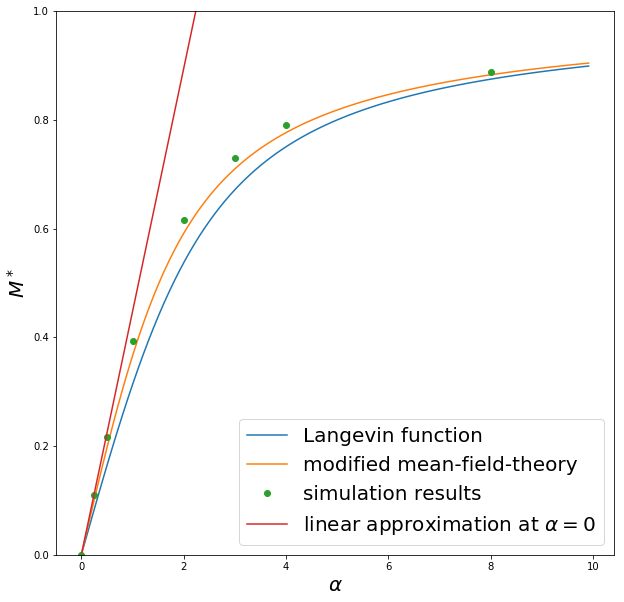

In [35]:
y = np.arange(0.01,10, 0.1, dtype=float).tolist()

alphas = [0] + alphas


L_func = []
L_mean_field = []
init_susceptibility = []

for i in y:
    L_func.append(L(i))
    L_mean_field.append(L(alpha_mean_field(i, dip_lambda, phi)))
    init_susceptibility.append(i*system.volume()*kT/(N*mu_0*dipm**2)*chi)

# devide all entries in the magnetization list by N to get the dimensionless magnetization
magnetization_star = []
for i in range(len(magnetization)):
    magnetization_star.append(magnetization[i] / N)

print('magnetization_star = {}'.format(magnetization_star))
    
    
plt.figure(figsize=(10,10))
plt.ylim(0, 1.)
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$M^*$', fontsize=20)
plt.plot(y, L_func, label='Langevin function')
plt.plot(y, L_mean_field, label='modified mean-field-theory')
plt.plot(alphas, magnetization_star, 'o', label='simulation results')
plt.plot(y, init_susceptibility, label=r'linear approximation at $\alpha = 0$')
plt.legend(fontsize=20)
plt.show()

We can see that the magnetization curve where we used the Langevin parameter of the modified mean-field-theory is closer to our simulation results. Also we can clearly see that the linear approximation holds only for very small values of $\alpha$.

At this point is should be mentioned, that the modified mean-field-model assumes a spatially homogeneous system which is not the case at higher volume fractions $\phi$ and dipolar interaction parameters $\lambda$ as the particles form clusters. We can already see this with our simulation results as they visibly deviate from the modified mean-field-model.

At sufficiently high volume fractions $\phi$ and dipolar interaction parameters $\lambda$ these clusters can be thus rigid, that simulation with normal methods are impossible as the relaxation times exceeds normal simulation times by far resulting in strongly correlated configurations and thus measurements.

[1] Zuowei Wang, Christian Holm, and Hanns Walter Müller. “Molecular dynamics
study on the equilibrium magnetization properties and structure of ferrofluids”. In:
Phys. Rev. E 66 (2 Aug. 2002), p. 021405. doi: 10.1103/PhysRevE.66.021405.
url: https://link.aps.org/doi/10.1103/PhysRevE.66.021405.

[2] Alexey O. Ivanov and Olga B. Kuznetsova. “Magnetic properties of dense ferrofluids:
An influence of interparticle correlations”. In: Phys. Rev. E 64 (4 Sept. 2001),
p. 041405. doi: 10.1103/PhysRevE.64.041405. url: https://link.aps.org/
doi/10.1103/PhysRevE.64.041405.